# 릿지 회귀(Ridge Regression)

- L2-norm 패널티를 더한 선형회귀 model
    - 기존 선형 모델에 규제항을 추가해 overfiting을 해결 
- 가중치(회귀계수)의 절대값 규제(regularization)하여 각각의 특성(feature)이 출력 값에 주는 영향을 최소한으로 만들도록 한다.
- 릿지 회귀는 회귀계수를 0에 가깝게 하지만 0으로 만들지는 않음

\begin{equation}
RidgeMSE = \frac{1}{N} \sum_{i=1}^{N}(y_i - \hat{y}_i)^2 + \alpha \sum_{i=1}^{p} w_i^2
\end{equation}
- $\alpha$: 사용자가 지정하는 매개변수
  - $\alpha$가 크면 규제의 효과가 커지고, $\alpha$가 작으면 규제의 효과가 작아짐
  - $\alpha$가 없으면 일반적인 선형 회귀와 같다.

__참고__ 
- 규제를 사용하면 다중공선성(multicollinearity) 문제를 방지하기 때문에 모델의 과대적합을 막을 수 있게 됨
  - 다중공선성 문제는 두 특성이 일치에 가까울 정도로 관련성(상관관계)이 높을 경우 발생

- 0에 가깝게 하지만 0으로 만들지 않는다는것만 기억함..

### 실습 보스턴 주택 가격에 대한 릿지 회귀

In [154]:
# from sklearn.datasets import load_boston
from sklearn.linear_model import Ridge
import pandas
from sklearn.model_selection import train_test_split
!wget https://raw.githubusercontent.com/myoh0623/dataset/main/boston.csv
boston_df = pandas.read_csv("boston.csv")
del boston_df["Unnamed: 0"]

x = boston_df.iloc[:,:-1]
y = boston_df.iloc[:,-1:]

# x, y = load_boston(return_X_y = True) # 데이터셋에 저장되어있을때만 사용가능하다. 
x_train, x_test, y_train, y_test = train_test_split(x, y)

--2022-12-21 22:48:14--  https://raw.githubusercontent.com/myoh0623/dataset/main/boston.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41084 (40K) [text/plain]
Saving to: ‘boston.csv.8’

boston.csv.8        100%[===================>]  40.12K  --.-KB/s    in 0.006s  

2022-12-21 22:48:14 (6.75 MB/s) - ‘boston.csv.8’ saved [41084/41084]



In [155]:
model = Ridge(alpha=0.2) # 알파 값을 높이면 규제를 더 높여 0에 가까이 만든다고 이해함. 
model.fit(x_train, y_train)

Ridge(alpha=0.2)

In [156]:
print(f"Train Data Score: {model.score(x_train,y_train)}")
print(f"Test Data Score : {model.score(x_test, y_test)}")

Train Data Score: 0.7233803497109355
Test Data Score : 0.7716406493651283


In [157]:
import matplotlib.pyplot as plt
def plot_boston_price(expected, predicted):
  plt.figure(figsize=(8,4))
  plt.scatter(expected, predicted)
  plt.plot([5, 50], [5, 50], '--r') 
  plt.xlabel('True price ($1,000s)')
  plt.ylabel('Predicted price ($1,000s)')
  plt.tight_layout()

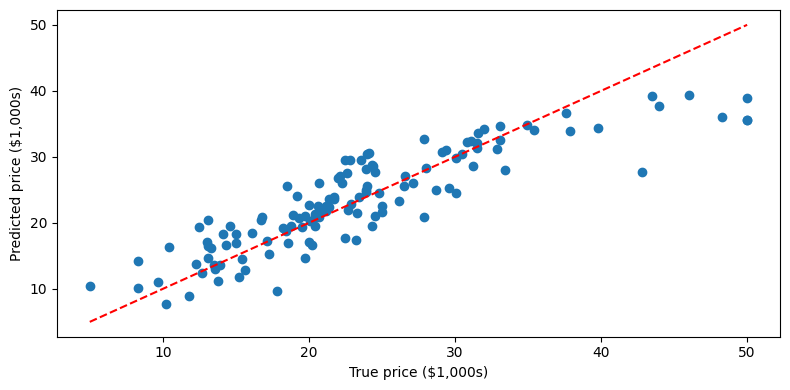

In [158]:
x_test_predict = model.predict(x_test)
plot_boston_price(y_test, x_test_predict)

### 실습 캘리포니아 주택 가격에 대한 릿지 회귀 
- alpha 값을 0.1, 0.2, 0.3, 0.4, 0.5 까지 작성하여 비교해 보세요
- alpha가 너무 작으면 overfiting, 너무 크면 underfitting 발생 

In [159]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
california = fetch_california_housing()

In [160]:
x_train, x_test, y_train, y_test = train_test_split(california.data, california.target, test_size = 0.2)
model = Ridge(alpha = 0.2)
model.fit(x_train, y_train)

Ridge(alpha=0.2)

In [161]:
model.alpha

0.2

In [162]:
import numpy as np 

In [163]:
models = [Ridge(alpha = round(i, 1)) for i in np.arange(0.1, 0.6, 0.1)]
trained_models = [] 

for model in models:
    model.fit(x_train, y_train)
    print(f"alpha : {model.alpha}", f'Train Data Score: {model.score(x_train, y_train)}' , f'Test Data Score: {model.score(x_test, y_test)}')
    trained_models.append(model) # 릿지 분석 결과 60%가 마지노선 

alpha : 0.1 Train Data Score: 0.6052785468144798 Test Data Score: 0.6099694187386098
alpha : 0.2 Train Data Score: 0.6052785456974796 Test Data Score: 0.6099688333634371
alpha : 0.3 Train Data Score: 0.605278543836755 Test Data Score: 0.6099682475989008
alpha : 0.4 Train Data Score: 0.6052785412330759 Test Data Score: 0.6099676614455112
alpha : 0.5 Train Data Score: 0.6052785378872113 Test Data Score: 0.6099670749037788


In [164]:
# LinearRegression에 대한 결과
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
print(f'Train Data Score : {model.score(x_train,y_train)}')
print(f'Test Data Score : {model.score(x_test, y_test)}')

Train Data Score : 0.6052785471869844
Test Data Score : 0.609970003723907


In [165]:
def plot_california_prices(expected, predicted):
  plt.figure(figsize = (8, 4))
  plt.scatter(expected, predicted)
  plt.plot([0, 5], [0, 5], '--r') 
  plt.xlabel('True price ($100,000s)')
  plt.ylabel('Predicted pirce ($100,000s)')
  plt.tight_layout() 

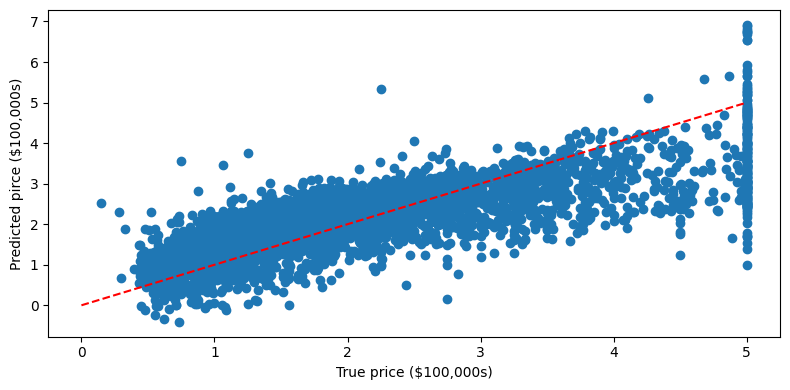

In [166]:
x_test_predict = model.predict(x_test)
plot_california_prices(y_test, x_test_predict)


# 라쏘 회귀(Lasso Regression)
- L1-norm 패널티를 더한 선형회귀 model
- 라쏘 회귀는 릿지 회귀와 비슷하게 가중치를 0에 가깝게 만들지만, 조금 다른 방식을 사용
- 불필요한 회귀계수를 급격하게 감소시켜 0으로 만들고 제거(이미지 참고)
    - model을 단순하게 만들어 overfiting을 방지한다. 

\begin{equation}
LassoMSE = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2 + \alpha \sum_{i=1}^{p} |w_i|
\end{equation}

- 라쏘 회귀도 매개변수인 $\alpha$ 값을 통해 규제의 강도 조절 가능
- 역시 이것도 0으로 만들고 제거한다는 사실만 기억하면 좋을거 같다. 


|릿지|라쏘|
|:---:|:----:|
|0에 가까이 만들지만 0이 되지는 않음|0으로 만들고 제거|

### 실습 보스턴 주택 가격에 대한 라쏘 회귀

In [167]:
from sklearn.linear_model import Lasso

In [168]:
import pandas

!wget https://raw.githubusercontent.com/myoh0623/dataset/main/boston.csv -O boston.csv
boston_df = pandas.read_csv("boston.csv")
del boston_df["Unnamed: 0"]

x = boston_df.iloc[:,:-1]
y = boston_df.iloc[:,-1:]

# x, y = load_boston(return_X_y = True)
x_train, x_test, y_train, y_test = train_test_split(x, y)

--2022-12-21 22:48:18--  https://raw.githubusercontent.com/myoh0623/dataset/main/boston.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41084 (40K) [text/plain]
Saving to: ‘boston.csv’

boston.csv          100%[===================>]  40.12K  --.-KB/s    in 0.01s   

2022-12-21 22:48:18 (3.54 MB/s) - ‘boston.csv’ saved [41084/41084]



In [169]:
model = Lasso(alpha = 0.1)
model.fit(x_train, y_train)

Lasso(alpha=0.1)

In [170]:
models = [Lasso(alpha = round(0.1**i, 3)) for i in np.arange(0, 4)]
trained_models = []

for model in models:
    model.fit(x_train, y_train)
    print(f"alpha: {model.alpha}", f"Train Data Score : {model.score(x_train,y_train)}", f"Test Data Score: {model.score(x_test,y_test)}")
    trained_models.append(model)

alpha: 1.0 Train Data Score : 0.6795454866940707 Test Data Score: 0.685913578787454
alpha: 0.1 Train Data Score : 0.7242540042067028 Test Data Score: 0.722054025273581
alpha: 0.01 Train Data Score : 0.7345569260957745 Test Data Score: 0.7443775289447019
alpha: 0.001 Train Data Score : 0.735018713878934 Test Data Score: 0.7471768725356092


In [171]:
print(f'Train Data Score: {trained_models[2].score(x_train, y_train)}')
print(f'Test Data Score: {trained_models[2].score(x_test, y_test)}')

Train Data Score: 0.7345569260957745
Test Data Score: 0.7443775289447019


In [172]:
model_end = trained_models[3]

In [173]:
x_test_predict = model_end.predict(x_test)


In [174]:
def plot_boston_price(expected, predicted):
  plt.figure(figsize = (8, 4))
  plt.scatter(expected, predicted)
  plt.plot([5, 50], [5, 50], '--r') 
  plt.xlabel('True price ($100,000s)')
  plt.ylabel('Predicted pirce ($100,000s)')
  plt.tight_layout()

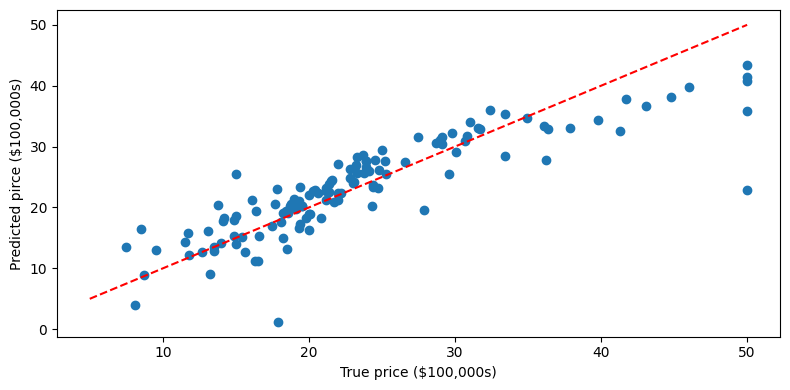

In [175]:
x_test_predict = model_end.predict(x_test)
plot_boston_price(y_test, x_test_predict)

### 실습 2 캘리포니아 주택 가격에 대한 라쏘 회귀 

In [176]:
x_train, x_test, y_train, y_test = train_test_split(california.data, california.target, test_size=0.2)

In [177]:
models = [Lasso(alpha = round(0.1**i, 4)) for i in np.arange(0, 5)]
trained_models = []

for model in models:
    model.fit(x_train, y_train)
    print(f"alpha: {model.alpha}", f"Train Data Score : {model.score(x_train,y_train)}", f"Test Data Score: {model.score(x_test,y_test)}")
    trained_models.append(model)

alpha: 1.0 Train Data Score : 0.2818493037566745 Test Data Score: 0.2892347432481539
alpha: 0.1 Train Data Score : 0.5435302396649848 Test Data Score: 0.5488124754831585
alpha: 0.01 Train Data Score : 0.6004018386941938 Test Data Score: 0.6089630752355062
alpha: 0.001 Train Data Score : 0.6041491856707356 Test Data Score: 0.6139839767449833
alpha: 0.0001 Train Data Score : 0.6041866503498885 Test Data Score: 0.6141632684852472


In [178]:
print(f'Train Data Score: {trained_models[3].score(x_train, y_train)}')
print(f'Test Data Score: {trained_models[3].score(x_test, y_test)}')

Train Data Score: 0.6041491856707356
Test Data Score: 0.6139839767449833


In [179]:
model_end = trained_models[3]

In [180]:
x_test_predict = model_end.predict(x_test)

In [181]:
def plot_california_prices(expected, predicted):
  plt.figure(figsize = (8, 4))
  plt.scatter(expected, predicted)
  plt.plot([0, 5], [0, 5], '--r') 
  plt.xlabel('True price ($100,000s)')
  plt.ylabel('Predicted pirce ($100,000s)')
  plt.tight_layout()

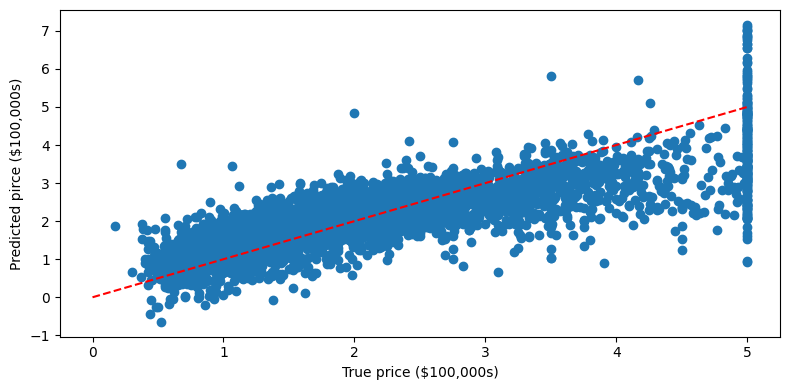

In [182]:
plot_california_prices(y_test, x_test_predict)

## 릿지회귀와 라쏘회귀의 정리 
- 순서는 train_test_split으로 기존과 test거리로 나눠주고 
- Ridge,Lasso 모델로 생성하여 (alpha값 입력해줘야한다) fit시키고 
- 데이터 스코어를 뽑아내는 순으로 만든다. 둘의 순서는 동일하다.
- 어느 순간 이상으로는 큰 차이가 없어보이는 구간이 있는데 그게 한계라고 보면 된다. 
- 여러개의 모델을 뽑기 위해서는 for 반복문과 list 컴프렌션을 적절하게 조합한 식이 필요한데 연습이 좀더 필요하다.

# 신축망(Elastic-Net)

- 릿지 회귀와 라쏘 회귀, 두 모델의 모든 규제를 사용하는 선형 모델 
- 데이터 특성이 많거나 서로 상관관계가 높은 특성이 존재 할 때 위의 두 모델보다 좋은 성능을 보여준다.
\begin{equation}
ElasticMSE = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i) + \alpha \rho \sum_{i=1}^{p} |w_i| + \alpha (1 - \rho) \sum_{i=1}^{p} w_i^2
\end{equation}

- $\alpha$: 규제의 강도를 조절하는 매개변수
- $\rho$: 라쏘 규제와 릿지 규제 사이의 가중치를 조절하는 매개변수

- 두개를 같이 쓴다는 이야기로 보인다 
- (추가) 
- l1_ratio = 0 (L2 규제만 사용).
- l1_ratio = 1 (L1 규제만 사용).
- 0< l1_ratio < 1 (L1 and L2 규제의 혼합사용)

### 실습 보스턴 주택 가격에 대한 신축망 

In [183]:
from sklearn.linear_model import ElasticNet

In [184]:
import pandas

!wget https://raw.githubusercontent.com/myoh0623/dataset/main/boston.csv -O boston.csv
boston_df = pandas.read_csv("boston.csv")
del boston_df["Unnamed: 0"]

x = boston_df.iloc[:,:-1]
y = boston_df.iloc[:,-1:]

# x, y = load_boston(return_X_y = True)
x_train, x_test, y_train, y_test = train_test_split(x, y)

--2022-12-21 22:48:23--  https://raw.githubusercontent.com/myoh0623/dataset/main/boston.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41084 (40K) [text/plain]
Saving to: ‘boston.csv’

boston.csv          100%[===================>]  40.12K  --.-KB/s    in 0.01s   

2022-12-21 22:48:23 (3.26 MB/s) - ‘boston.csv’ saved [41084/41084]



In [185]:
model = ElasticNet(alpha = 0.001, l1_ratio = 0.5) #두개의 규제 혼합 사용 
model.fit(x_train, y_train)

ElasticNet(alpha=0.001)

In [186]:
model.l1_ratio

0.5

In [187]:
print(f"Train Data Score {model.score(x_train, y_train)}")
print(f"Test Data Score : {model.score(x_test, y_test)}")

Train Data Score 0.7364186361301328
Test Data Score : 0.7478127388823779


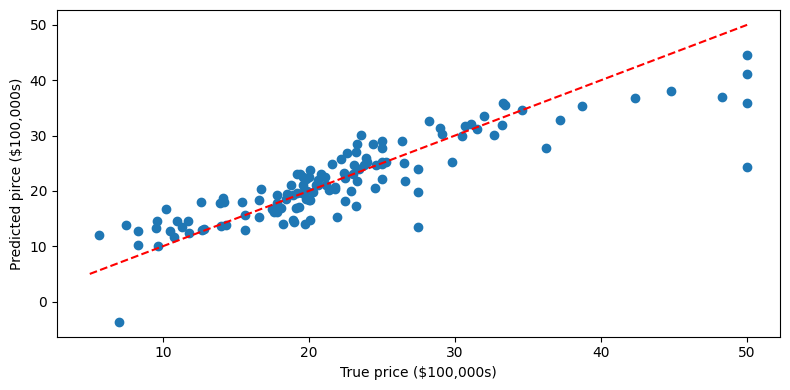

In [188]:
x_test_predict = model.predict(x_test)
plot_boston_price(y_test,x_test_predict)

### 실습 2 캘리포니아 주택 가격에 대한 신축망 

In [189]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()

In [190]:
x_train, x_test, y_train, y_test = train_test_split(california.data, california.target, test_size = 0.2)

In [191]:
model = ElasticNet()

In [192]:
model.alpha

1.0

In [193]:
model.l1_ratio

0.5

In [198]:
models = [ElasticNet(alpha = round(0.1**i,3), l1_ratio= 0.5) for i in np.arange(0,4)]

trained_models = [] 

for model in models:
    model.fit(x_train, y_train)
    print(f"alpha : {model.alpha}, l1_ratio : {model.l1_ratio}", f'Train Data Score: {model.score(x_train, y_train)}' , f'Test Data Score: {model.score(x_test, y_test)}')
    trained_models.append(model)

alpha : 1.0, l1_ratio : 0.5 Train Data Score: 0.42295284359578045 Test Data Score: 0.42124510190484554
alpha : 0.1, l1_ratio : 0.5 Train Data Score: 0.5765711250295126 Test Data Score: 0.5721076214448004
alpha : 0.01, l1_ratio : 0.5 Train Data Score: 0.6075879676426323 Test Data Score: 0.5946357587487003
alpha : 0.001, l1_ratio : 0.5 Train Data Score: 0.6097601645208455 Test Data Score: 0.5882268532279011


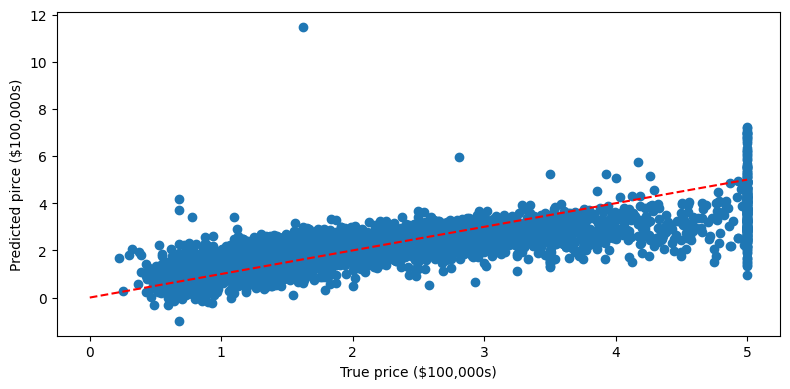

In [199]:
x_test_predict = trained_models[3].predict(x_test)
plot_california_prices(y_test, x_test_predict)

# 다항 회귀 (Polynomial Regression)

- 입력 데이터를 비선형 변환 후 사용하는 방법
- 모델 자체는 선형 모델 

\begin{equation}
\hat{y} = w_1 x_1 + w_2 x_2 + w_3 x_3 + w_4 x_1^2 + w_5 x_2^2
\end{equation}

- 차수가 높아질수록 더 복잡한 데이터 학습 가능

## 구현 

- 사이킷런은 다항회귀 api를 제공x 
- 'PolynomialFeatures' 로 피처들을 변환한뒤, "LinearRegression"을 순차적으로 적용해야함 
- "Pipeline"을 이용하면 두가지 api 결합을 좀 더 깔끔하게 수행 가능함

In [200]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(0) # 난수를 예측 가능하게 만들어주는 함수 

m = 100
X = 6 * np.random.rand(m, 1) -3  #100개의 1차원 어레이 (0,1 사이로 이루어진 난수 *6 후 -3)
y = X**2 + 2*X + 3 + np.random.normal(0,1, size=(m,1)) # random.normal 노이즈 추가 
y = y.flatten() # 어레이 묶어주는 작업 
print(X.shape, y.shape)

(100, 1) (100,)


In [201]:
df = pd.DataFrame({"X":X.flatten(), "Y":y})
df.head()

,X,Y
0,0.292881,2.506392
1,1.291136,8.150132
2,0.616580,5.078994
3,0.269299,2.074877
4,-0.458071,3.781939


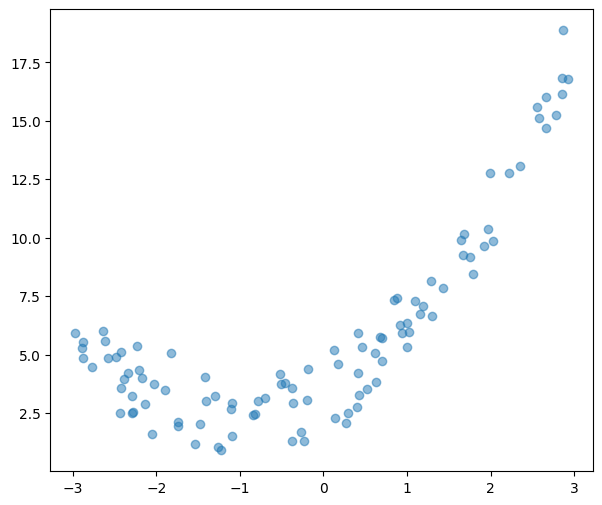

In [203]:
plt.figure(figsize=(7,6))
plt.scatter(X, y, alpha=0.5) #scatter의 알파는 투명도를 의미합니다. 
plt.show()

### LInear model 생성 

In [204]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [205]:
lr = LinearRegression()
lr.fit(X,y)
print(lr.coef_, lr.intercept_) 
# w_0, w_1 coef_ 는 가중치 intercept_는 절편 coef_인 가중치는 컬럼의 개수만큼 나오는 듯 하다. 

[1.78189543] 6.175619278567208


In [206]:
pred = lr.predict(X) # lr 모델(X,y)를 훈련시킨 모델에 (X)예측을 넣는다 

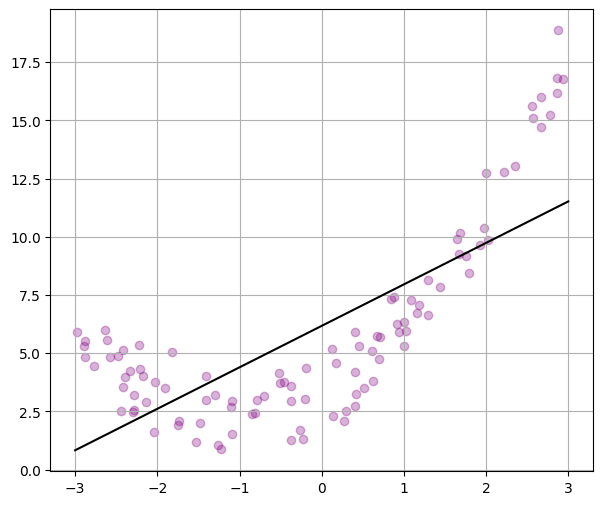

In [207]:
X_new = np.linspace(-3,3,100).reshape(-1, 1) # reshape(-1,1) 배열을 2차원으로 만들어주는 마법
pred_new = lr.predict(X_new)  # -3,3 사이에 100개의 난수 예측값으로 집어넣는다.

plt.figure(figsize=(7,6))

plt.scatter(X, y, alpha=0.3 , c= "purple")
plt.plot(X_new, pred_new, color= "black")

plt.grid(True) # 뒤 눈금선 보이게 하는 옵션
plt.show()

### PolynomialFeatures를 이용해 다항회귀구현

In [208]:
from sklearn.preprocessing import PolynomialFeatures

In [209]:
poly_f = PolynomialFeatures(degree=2, # 2차식 생성 2의제곱 차식을 정할 수 있다 지금은 2차식 
                            include_bias=False) # True일경우 0차항 생성 
X_poly = poly_f.fit_transform(X) # 최고차수가 2차인 Data set으로 변경 


#### fit_transform과 transform의 차이
|fit_transform|transform|
|:------------:|:----------:|
|train모델에만 쓰인다.|test모델에만 쓰인다.|
- fit_transform을 test모델에도 쓴다면 새로운 값에 대한 모델의 값을 계산하지 못하고 학습해 버리기 때문

In [210]:
X.shape, X_poly.shape # x값을 x제곱의 형태로 만들어준것이다. 

((100, 1), (100, 2))

In [211]:
X[:5]

array([[ 0.29288102],
       [ 1.2911362 ],
       [ 0.61658026],
       [ 0.2692991 ],
       [-0.4580712 ]])

In [212]:
X_poly[:5]

array([[ 0.29288102,  0.08577929],
       [ 1.2911362 ,  1.66703268],
       [ 0.61658026,  0.38017121],
       [ 0.2692991 ,  0.072522  ],
       [-0.4580712 ,  0.20982923]])

In [213]:
poly_f.get_feature_names_out() #W_1과 W_2의 값을 나타낸다.

array(['x0', 'x0^2'], dtype=object)

In [214]:
#최고차항이 2차식이지만 lineagression을 통해 학습한다. 대신 fittransform을 이용해 변경된 데이터를 넣어준다.
lr2 = LinearRegression()
lr2.fit(X_poly, y)

# real 3 + 2x + x^2 
# w0 + w1x w2*x^2  w0 = 3 w1 = 2 w2 = 1  X**2 + 2*X + 3 coef_ x에대한 값 intercept_ 뒤에 상수 
print(lr2.coef_, lr2.intercept_)

[1.97906552 0.94978823] 3.340500756262885


In [217]:
X_new = np.linspace(-3, 3 ,100).reshape(-1,1)
X_new_poly = poly_f.transform(X_new) # 2차식으로 바꿔줌 X_new를 
pred_new2 = lr2.predict(X_new_poly) #2차식 X_new를 lr2모델에 예측한 값을 나오게 함 

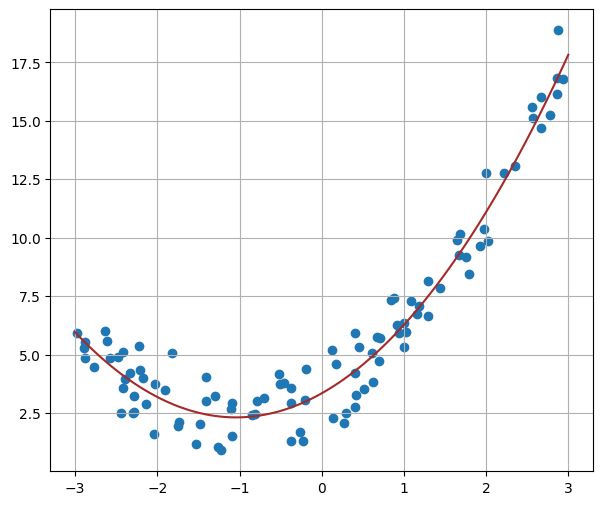

In [221]:
plt. figure(figsize= (7,6))
plt.scatter(X,y)
plt.plot(X_new, pred_new2, color = "brown")
plt.grid(True)
plt.show()

### 20차원

In [222]:
pnf = PolynomialFeatures(degree=20, include_bias=False)
X_train_poly_20 = pnf.fit_transform(X)
X_train_poly_20.shape, X.shape # 차워을 바꿔주는 모습

((100, 20), (100, 1))

In [223]:
lr = LinearRegression()
lr.fit(X_train_poly_20, y)

LinearRegression()

In [224]:
X_new = np.linspace(-3,3,100).reshape(-1,1)
X_new_poly_20 = pnf.transform(X_new)
pred_new_20 = lr.predict(X_new_poly_20)

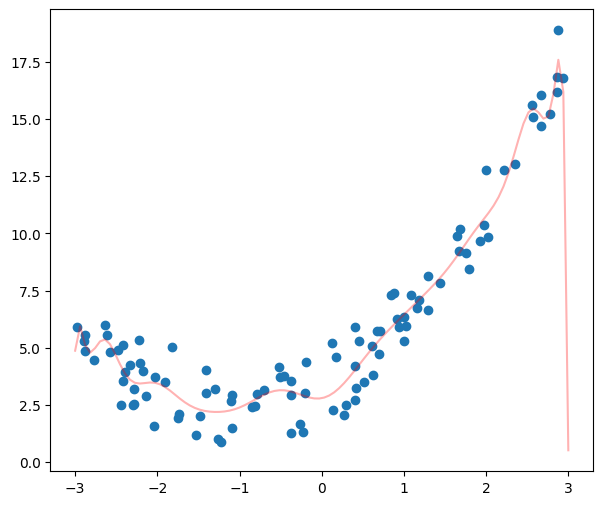

In [225]:
plt.figure(figsize=(7,6))
plt.scatter(X,y)
plt.plot(X_new, pred_new_20, color='r', alpha = 0.3)
plt.show() 
# overfitting의 발생을 알 수 있다. 

In [226]:
# pipeline 생성
from sklearn.pipeline import make_pipeline

In [227]:
model = make_pipeline(
    PolynomialFeatures(degree=2),#2차원
    LinearRegression()
)

model.fit(X,y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [230]:
X.shape, y.shape

((100, 1), (100,))

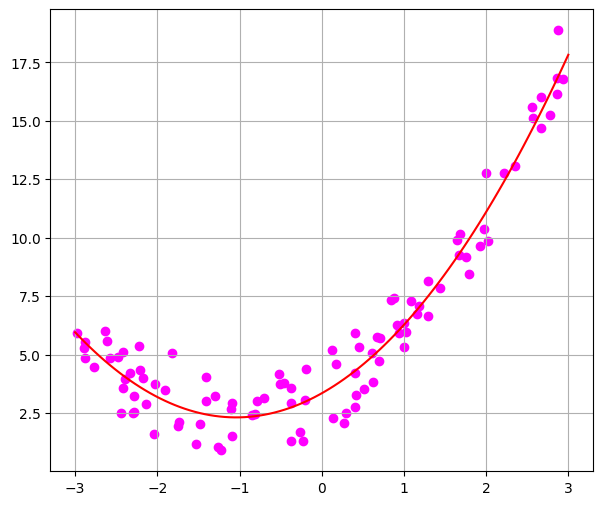

In [236]:
X_test = np.linspace(-3,3,100).reshape(-1,1)
x_predict = model.predict(X_test)

plt.figure(figsize=(7,6))
plt.scatter(X,y, c= "magenta")
plt.plot(X_test, x_predict, color = 'red')
plt.grid(True)
plt.show()

### 실습 보스턴 주택가격에 대한 다항 회귀

- 2차 회귀 다항식을 이용하여 주택값을 예측해 보자.
- 예측 후 R2 Score를 확인해보자 
- vscode에서 실습이 되지 않으므로 순서와 이해만 한다.

In [297]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, cross_val_score
#from sklearn.datasets import load_boston

In [ ]:
x, y = load_boston(return_X_y=True) #리턴 값으로 행렬x와 벡터 y가 리드되어 train_test를 빠르게 할 수 있다.
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=123)

In [ ]:
X_train[0].shape # 특징이 13개 

### PolynomialFeatures

In [ ]:
pnf = PolynomialFeatures(degree=2, include_bias=True)
x_train_poly = pnf.fit_transform(x_train[0].reshape(1,13))
x_train_poly.shape # 13 -> 105
# 2차식 만들어주고 train[0]을 백터로 만들어준다 shape 를 확인하면 13 - > 105

In [ ]:
import numpy as np
test = np.arange(2,15).reshape(1,13)
pnf = PolynomialFeatures(degree=2, include_bias=True)
test_poly = pnf.fit_transform(test)
test.shape, test_poly.shape

### Pipeline 생성

In [ ]:
model = make_pipeline(
    PolynomialFeatures(degree=2), #2차식과 1차식 파이프라인 생성 
    # StandardScaler(),
    LinearRegression()
)
model.fit(x_train, y_train)

In [ ]:
print(f'Train Data Score : {model.score(x_train, y_train)}') 
print(f'Test Data Score : {model.score(x_test, y_test)}')

In [ ]:
model_1 = make_pipeline(
    PolynomialFeatures(degree=2),
    StandardScaler(),
    LinearRegression()
)
model_1.fit(x_train, y_train)

In [ ]:
print(f'Train Data Score : {model_1.score(x_train, y_train)}')
print(f'Test Data Score : {model_1.score(x_test, y_test)}')

In [ ]:
def plot_boston_price(expected, predicted):
  plt.figure(figsize=(8,4))
  plt.scatter(expected, predicted)
  plt.plot([5, 50], [5, 50], '--r')
  plt.xlabel('True price ($1,000s)')
  plt.ylabel('Predicted price ($1,000s)')
  plt.tight_layout()

In [ ]:
predicted = model.predict(x_test)
expected = y_test
plot_boston_price(expected,predicted)

### 진짜 실습 캘리포니아 주택 가격에 대한 다항 회귀 

In [298]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()

x_train, x_test, y_train, y_test = train_test_split(california.data, california.target, test_size=0.2)

In [335]:
model = make_pipeline(
    PolynomialFeatures(degree=2),
    LinearRegression()
)
model.fit(x_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [336]:
print(f'Train Data Score : {model.score(x_train, y_train)}')
print(f'Test Data Score : {model.score(x_test, y_test)}')

Train Data Score : 0.6860761450059418
Test Data Score : 0.613915837688648


In [337]:
def plot_boston_price(expected, predicted):
  plt.figure(figsize=(8,4))
  plt.scatter(expected, predicted)
  plt.plot([0, 6], [0, 6], '--r')
  plt.xlabel('True price ($1,000s)')
  plt.ylabel('Predicted price ($1,000s)')
  plt.tight_layout()

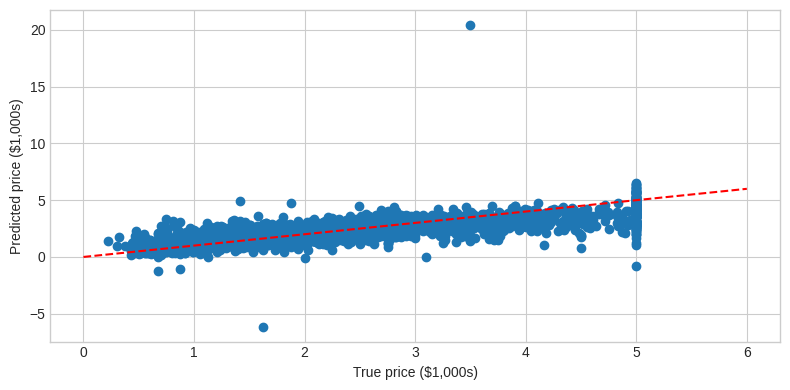

In [338]:
predicted = model.predict(x_test)
expected = y_test
plot_boston_price(expected,predicted)

#### 정리
transform과 파이프라인이 있는데 파이프라인이 더 간단하다. 
연습이 필요하다 그래도 이해는 했다 